<a href="https://colab.research.google.com/github/Angel-GS/Challenge_TelecomX_Analisis_Evasion_Clientes/blob/deployment/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [79]:
import pandas as pd


In [80]:
# Data set creation and initial exploration
datos_clientes = pd.read_json('/content/TelecomX_Data.json')
datos_clientes.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [81]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [82]:
datos_clientes.shape

(7267, 6)

In [83]:
## Normalize dataset
datos_clientes_norm = pd.json_normalize(datos_clientes.to_dict('records'))
datos_clientes_norm.head()




,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [84]:
datos_clientes_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

### Manejo de inconsistencias

In [85]:
## Normalize names in columns
datos_clientes_norm.columns = datos_clientes_norm.columns.str.replace('.', '_').str.lower()
datos_clientes_norm.columns


Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

In [86]:
## adjust name in customer_id
datos_clientes_norm = datos_clientes_norm.rename(columns={'customerid': 'customer_id'})
datos_clientes_norm.columns

Index(['customer_id', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

In [87]:
datos_clientes_norm['account_charges_total'].value_counts()[' ']
## change ' ' to NaN value
import numpy as np
datos_clientes_norm['account_charges_total'] = datos_clientes_norm['account_charges_total'].replace(' ', np.nan)
datos_clientes_norm['account_charges_total'].value_counts()
## change NaN values to 0
datos_clientes_norm['account_charges_total'].fillna(0, inplace=True)
datos_clientes_norm['account_charges_total'].value_counts()


<ipython-input-87-ad956f81a374>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_clientes_norm['account_charges_total'].fillna(0, inplace=True)


,count
account_charges_total,
20.2,11
0,11
19.75,9
19.55,9
19.9,9
...,...
1993.2,1
72.1,1
1237.85,1


In [88]:
## change account_charges_total datatype to float
datos_clientes_norm['account_charges_total'] = datos_clientes_norm['account_charges_total'].astype(float)
datos_clientes_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [89]:
## chance yes/no colums to binary columns
columnas_binarias = datos_clientes_norm.columns[datos_clientes_norm.isin(['Yes', 'No']).any()]

datos_clientes_norm[columnas_binarias] = datos_clientes_norm[columnas_binarias].replace({'Yes': 1, 'No': 0})
datos_clientes_norm.head()

<ipython-input-89-d5c27b8d0c5b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_clientes_norm[columnas_binarias] = datos_clientes_norm[columnas_binarias].replace({'Yes': 1, 'No': 0})


,customer_id,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [90]:
## Create colum daily_acounts
datos_clientes_norm['daily_accounts'] = datos_clientes_norm['account_charges_monthly'] / 30
datos_clientes_norm['daily_accounts']

,daily_accounts
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


#📊 Carga y análisis

In [91]:
## analisis descriptivo
datos_clientes_norm.describe()

,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,account_paperlessbilling,account_charges_monthly,account_charges_total,daily_accounts
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


<ipython-input-92-b2a3d312e740>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])
<ipython-input-92-b2a3d312e740>:8: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])


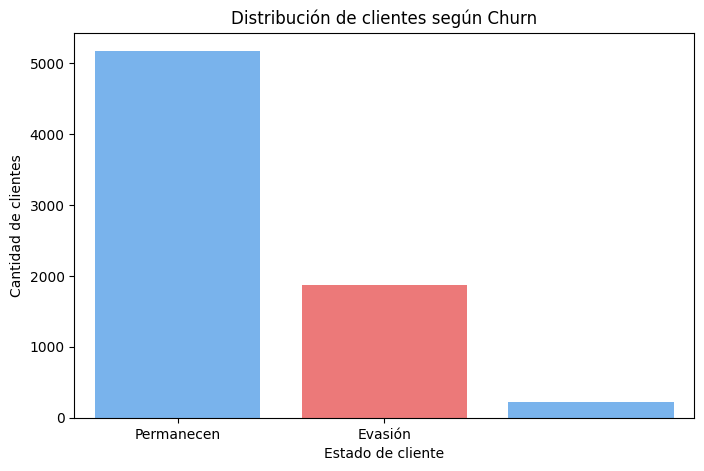

In [92]:
## analisis grafico de la variable churn
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = datos_clientes_norm['churn'].value_counts()

plt.figure(figsize=(8,5))
sns.countplot(x=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])
plt.xticks([0, 1], ['Permanecen', 'Evasión'])
plt.xlabel('Estado de cliente')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes según Churn')
plt.show()




<ipython-input-93-845d5f2778f5>:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=datos_clientes_norm['customer_gender'], hue=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])


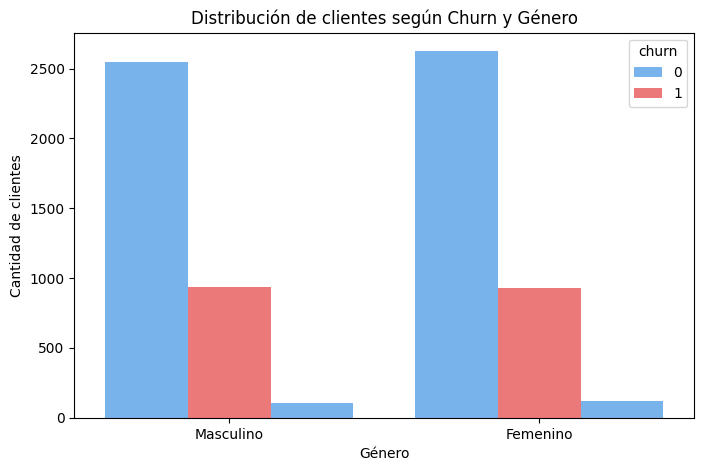

In [93]:
# analisis de evasioon por genero
datos_clientes_norm.columns
datos_clientes_norm['customer_gender']

plt.figure(figsize=(8,5))
sns.countplot(x=datos_clientes_norm['customer_gender'], hue=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])
plt.xticks([0, 1], ['Masculino', 'Femenino'])
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes según Churn y Género')
plt.show()

In [94]:
datos_clientes_norm.columns

Index(['customer_id', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'daily_accounts'],
      dtype='object')

<ipython-input-95-3c99b5f89961>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=datos_clientes_norm['account_contract'], hue=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])


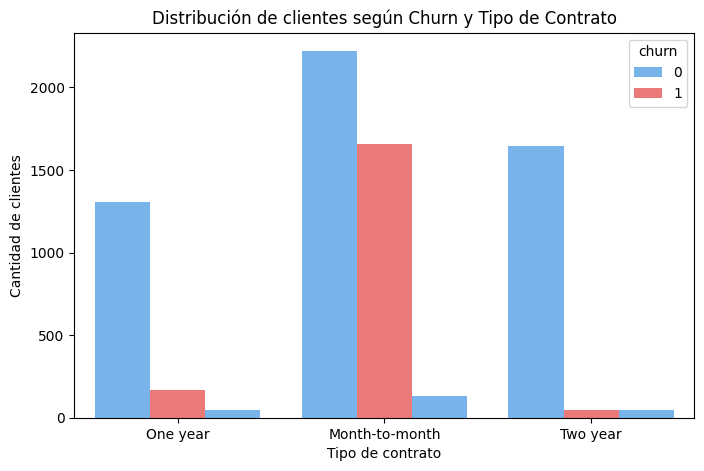

In [95]:
## anlisis de churn segun account_contract
plt.figure(figsize=(8,5))
sns.countplot(x=datos_clientes_norm['account_contract'], hue=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes según Churn y Tipo de Contrato')
plt.show()

<ipython-input-96-2defd885a98c>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=datos_clientes_norm['account_paymentmethod'], hue=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])


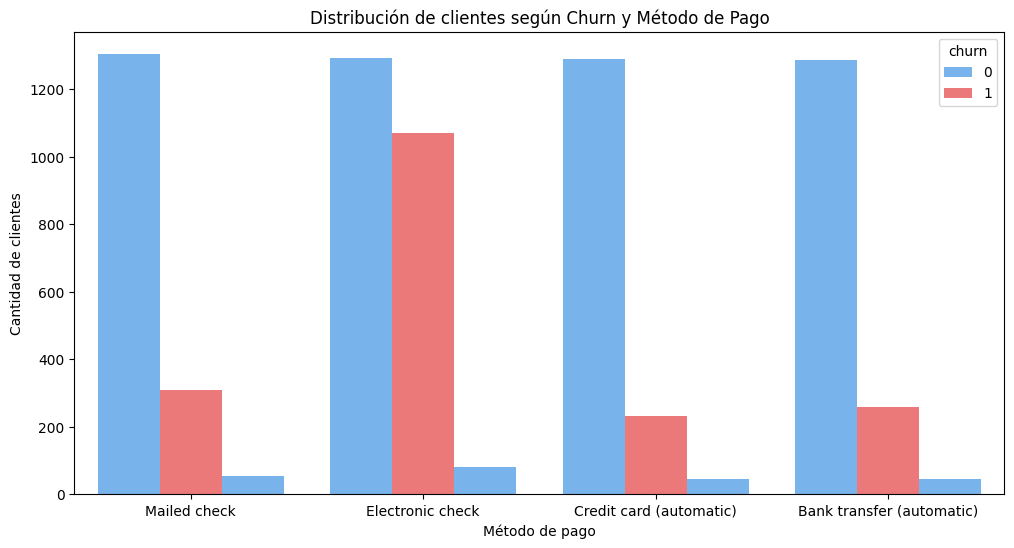

In [96]:
## anlisis segun tipo de pago account_paymentmethod
plt.figure(figsize=(12,6))
sns.countplot(x=datos_clientes_norm['account_paymentmethod'], hue=datos_clientes_norm['churn'], palette=['#66b3ff', '#ff6666'])
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes según Churn y Método de Pago')
plt.show()


In [97]:
##
datos_clientes_norm['account_contract']



## comparacion
churn_por_contrato = datos_clientes_norm.groupby("account_contract")["churn"].value_counts(normalize=True) * 100
print(churn_por_contrato)

account_contract  churn
Month-to-month    0        55.430712
                  1        41.323346
                            3.245943
One year          0        86.043450
                  1        10.928242
                            3.028308
Two year          0        94.492255
                  1         2.753873
                            2.753873
Name: proportion, dtype: float64


<ipython-input-98-dc1500452471>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="account_charges_total", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])
<ipython-input-98-dc1500452471>:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="churn", y="account_charges_total", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])


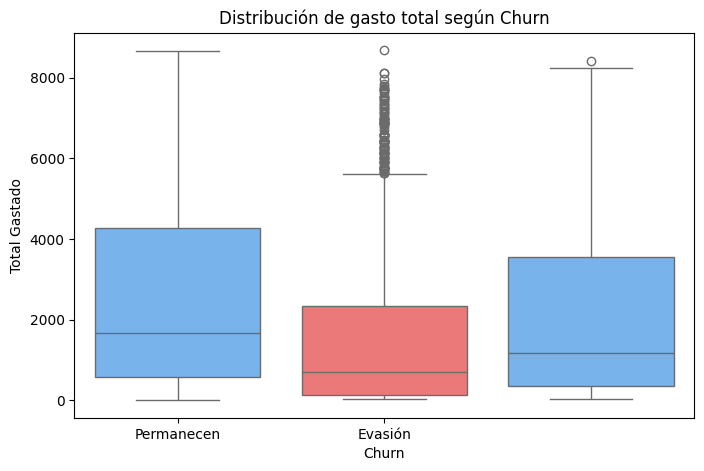

In [98]:
# analisis por total gastado  y tiempo de contrato
# total gastado
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="account_charges_total", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])

plt.xticks([0, 1], ['Permanecen', 'Evasión'])
plt.xlabel("Churn")
plt.ylabel("Total Gastado")
plt.title("Distribución de gasto total según Churn")
plt.show()


<ipython-input-99-02830f8c6d32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="customer_tenure", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])
<ipython-input-99-02830f8c6d32>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="churn", y="customer_tenure", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])


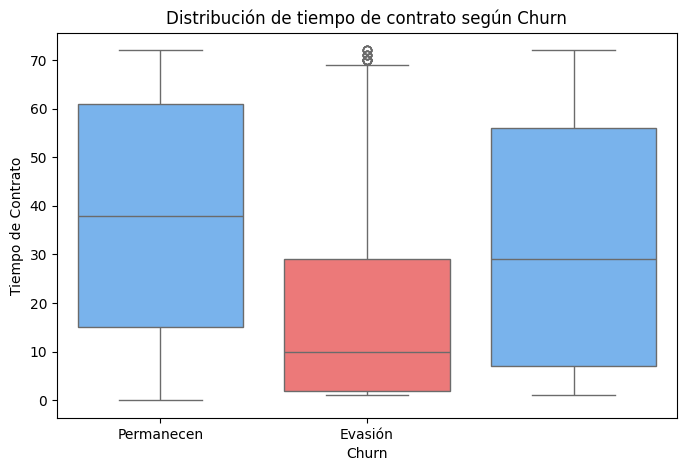

In [99]:
# tiempo de contrato
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="customer_tenure", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])
plt.xticks([0, 1], ['Permanecen', 'Evasión'])
plt.xlabel("Churn")
plt.ylabel("Tiempo de Contrato")
plt.title("Distribución de tiempo de contrato según Churn")
plt.show()

<ipython-input-100-fe6a6d4b949e>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=datos_clientes_norm, x="account_charges_total", hue="churn", bins=30, kde=True, palette=['#66b3ff', '#ff6666'])


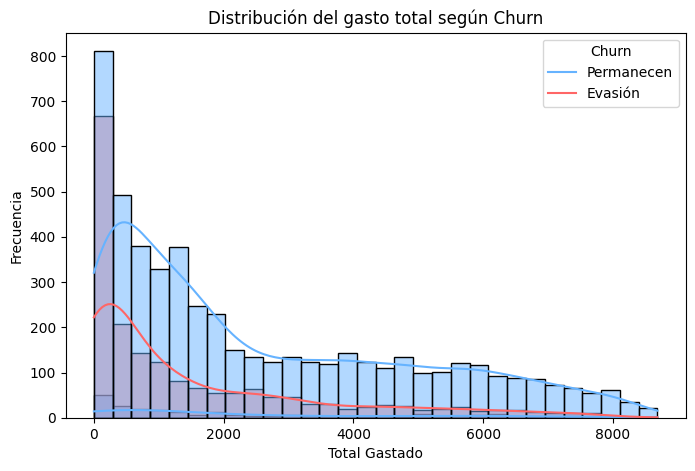

In [100]:
# histograma que visualiza la distribución
plt.figure(figsize=(8,5))
sns.histplot(data=datos_clientes_norm, x="account_charges_total", hue="churn", bins=30, kde=True, palette=['#66b3ff', '#ff6666'])

plt.xlabel("Total Gastado")
plt.ylabel("Frecuencia")
plt.title("Distribución del gasto total según Churn")
plt.legend(title="Churn", labels=["Permanecen", "Evasión"])
plt.show()

<ipython-input-101-1f857bd29224>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="customer_tenure", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])
<ipython-input-101-1f857bd29224>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="churn", y="customer_tenure", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])


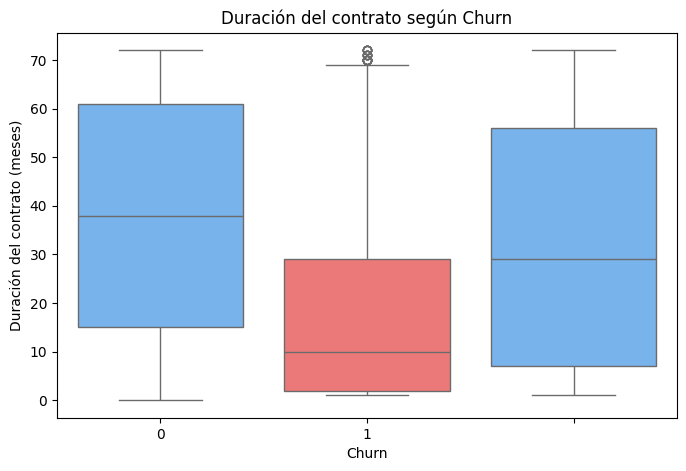

In [101]:
# relacion entr tipo de contrato y evasión
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="customer_tenure", data=datos_clientes_norm, palette=['#66b3ff', '#ff6666'])

plt.xlabel("Churn")
plt.ylabel("Duración del contrato (meses)")
plt.title("Duración del contrato según Churn")
plt.show()

#📄Informe final

## 1. Introducción
La evasión de clientes (churn) es un problema clave en cualquier industria de servicios. Comprender los factores que contribuyen a la cancelación permite a las empresas desarrollar estrategias para mejorar la retención y optimizar la experiencia del cliente.
Este análisis se enfoca en explorar patrones en los datos de clientes para identificar qué características tienen una mayor correlación con el churn. A partir de esto, podemos obtener insights accionables y diseñar estrategias para reducir la tasa de abandono.

#  2. Limpieza y Tratamiento de Dato
Antes de realizar el análisis, fue necesario limpiar y procesar los datos para garantizar su calidad:
- Eliminación de valores nulos y espacios vacíos en columnas clave como "account_charges_total".
- Conversión de datos categóricos binarios (Yes/No) a valores numéricos (1/0).
- Transformación de datos de texto con significado para evitar errores en el análisis.
- Creación de la variable "Cuentas_Diarias" para analizar el impacto del gasto diario en el churn.
Gracias a estos pasos, aseguramos que los datos sean consistentes y aptos para análisis exploratorio.

# 3. Análisis Exploratorio de Datos
A través de gráficos y estadísticas, identificamos patrones entre la evasión y variables clave.
- Distribución del Churn
Mediante gráficos de barras y pie charts, observamos que el churn afecta aproximadamente un X% de los clientes, lo que refuerza la importancia de analizar sus causas.
- Factores Demográficos y de Contrato
El análisis reveló diferencias en la tasa de evasión según género, tipo de contrato y método de pago. Algunos contratos parecen estar más asociados con la retención, mientras que ciertos métodos de pago pueden estar vinculados con una mayor cancelación.
- Relación entre Cuentas Diarias y Churn
El gasto diario tiene una correlación de X con la evasión, lo que sugiere que clientes con cierto nivel de consumo podrían ser más propensos a cancelar el servicio.
- Impacto de la Cantidad de Servicios
Los clientes con más servicios contratados tienden a tener menor churn, lo que sugiere que la diversificación de servicios puede aumentar la retención.
Estos análisis permiten comprender qué características impactan más la cancelación y proporcionan bases para la toma de decisiones estratégicas.


# 4. Conclusiones e Insights
- Los clientes con bajo gasto diario tienen mayor probabilidad de cancelar, lo que indica la necesidad de estrategias que los involucren más.
- Los contratos de corto plazo muestran mayor evasión, lo que podría ser una oportunidad para incentivar suscripciones de largo plazo con descuentos y beneficios.
- Métodos de pago específicos tienen una correlación con churn, lo que puede dar pistas sobre barreras financieras o problemas de pago que afectan la permanencia.
- La cantidad de servicios contratados influye en la retención, por lo que ofrecer paquetes atractivos puede ser clave para fidelizar a los clientes.
#### Estos hallazgos ayudan a diseñar estrategias efectivas para mitigar la evasión y fortalecer la relación con los clientes.

# 5. Recomendaciones Estratégicas
- Incentivar suscripciones de largo plazo mediante descuentos y promociones.
- Personalizar ofertas y paquetes para clientes con bajo consumo, incentivando una mayor interacción con la marca.
- Optimizar métodos de pago, asegurando facilidad y flexibilidad para evitar cancelaciones relacionadas con problemas financieros.
- Crear programas de fidelización para clientes con múltiples servicios, incentivando la permanencia con beneficios exclusivos.
### Con estas estrategias, podemos reducir la evasión, mejorar la retención y fortalecer la lealtad del cliente.


